**AI Week 1: Exercise 2**


---



Aditi Desai

200968126

MetaData:

The original dataset for "ECG5000" is a 20-hour long ECG downloaded from Physionet. 5,000 heartbeats were randomly selected. The patient has severe congestive heart failure and the class values were obtained by automated annotation

Train Size 500	
Test Size	4500 
Length	140 
Number of Classes 5	
Number of Dimensions 1	
Type ECG

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [4]:
dataframe=pd.read_csv('ecg.csv',header=None)
raw_data=dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [5]:
labels=raw_data[:,-1]
data=raw_data[:,0:-1]
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=0.2,random_state=21)

In [6]:
min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)
train_data=(train_data-min_val)/(max_val-min_val)
test_data=(test_data-min_val)/(max_val-min_val)
train_data=tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)
test_data.dtype

tf.float32

train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. Separate the normal rhythms from the abnormal rhythms.

In [7]:
trian_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data = train_data[train_labels==True]
normal_test_data = test_data[test_labels==True]

anomalous_train_data = train_data[train_labels==False]
anomalous_test_data = test_data[test_labels==False]
normal_test_data

<tf.Tensor: shape=(560, 140), dtype=float32, numpy=
array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
        0.3713729 ],
       [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
        0.49527124],
       [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
        0.4754273 ],
       ...,
       [0.48304972, 0.36122933, 0.27729514, ..., 0.32799056, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907097, 0.22604261, ..., 0.39099607, 0.45987615,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546008, ..., 0.4733389 , 0.55036914,
        0.37805188]], dtype=float32)>

Plot and observe a normal ECG vs an anomalous ECG.

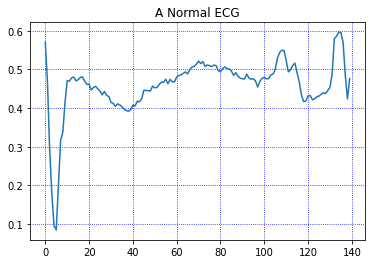

In [8]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

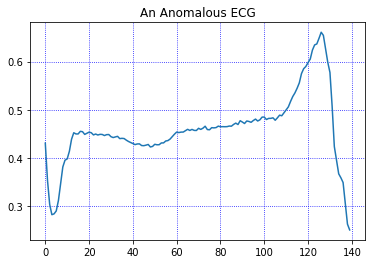

In [9]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [10]:
class AnomalyDetector(Model):
    def __init__(self):
        
        super(AnomalyDetector,self).__init__()
        self.encoder=tf.keras.Sequential([layers.Dense(32,activation="relu"),layers.Dense(16,activation="relu"),layers.Dense(8,activation="relu")])
         
        self.decoder=tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(x)
        return decoded
autoencoder=AnomalyDetector()

autoencoder.compile(optimizer='adam',loss='mae')

autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [11]:
history=autoencoder.fit(normal_train_data,normal_train_data,epochs=20,batch_size=512,
                       validation_data=(test_data,test_data),shuffle=True)

Epoch 1/20


5/5 [==============================] - 1s 32ms/step - loss: 0.0735 - val_loss: 0.0643
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0621 - val_loss: 0.0567
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0561 - val_loss: 0.0529
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.0506
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0500 - val_loss: 0.0490
Epoch 6/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.0474
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0442 - val_loss: 0.0459
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.0450
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0391 - val_loss: 0.0437
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.0420
Epoch 11/20
5/5 [==============================] 

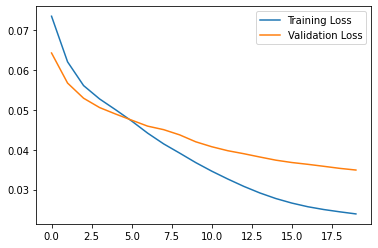

In [12]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

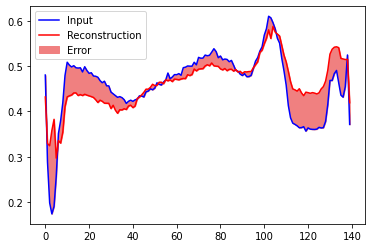

array([[0.        , 0.7787665 , 0.21544257, ..., 0.        , 0.13859625,
        0.        ],
       [0.        , 0.78448415, 0.23012148, ..., 0.        , 0.18001126,
        0.01983834],
       [0.        , 0.8057363 , 0.2526167 , ..., 0.        , 0.21696913,
        0.04817721],
       ...,
       [0.        , 0.7443187 , 0.17722692, ..., 0.        , 0.08584061,
        0.        ],
       [0.        , 0.7470839 , 0.1963464 , ..., 0.        , 0.1505465 ,
        0.01605988],
       [0.        , 0.78164697, 0.22213425, ..., 0.        , 0.18094307,
        0.029817  ]], dtype=float32)

In [13]:
encoded_imgs=autoencoder.encoder(normal_test_data).numpy()
decoded_imgs=autoencoder.decoder(normal_test_data).numpy()
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],normal_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()
encoded_imgs

In [14]:
encoded_imgs=autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs=autoencoder.decoder(anomalous_test_data).numpy()

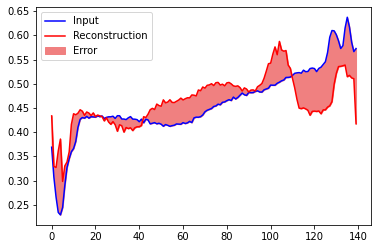

In [15]:
plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],anomalous_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

Plot the reconstruction error on normal ECGs from the training set

In [16]:
reconstructions=autoencoder.predict(normal_train_data)
reconstructions

74/74 [==============================] - 0s 847us/step


array([[0.430847  , 0.32580233, 0.31323484, ..., 0.51101506, 0.5135873 ,
        0.4190341 ],
       [0.43189052, 0.33042732, 0.32175606, ..., 0.5121996 , 0.5146126 ,
        0.42128113],
       [0.4301712 , 0.3247276 , 0.3133568 , ..., 0.5114797 , 0.5149792 ,
        0.4169603 ],
       ...,
       [0.43120012, 0.32642728, 0.31941578, ..., 0.51305515, 0.5144396 ,
        0.4165613 ],
       [0.42992705, 0.32392037, 0.31117237, ..., 0.51062274, 0.5141796 ,
        0.41857383],
       [0.43165523, 0.32833982, 0.32110474, ..., 0.51201385, 0.51412046,
        0.41836786]], dtype=float32)

In [17]:
train_loss=tf.keras.losses.mae(reconstructions,normal_train_data).numpy()
train_loss

array([0.03010686, 0.01544035, 0.02244667, ..., 0.0147954 , 0.0254887 ,
       0.01949233], dtype=float32)

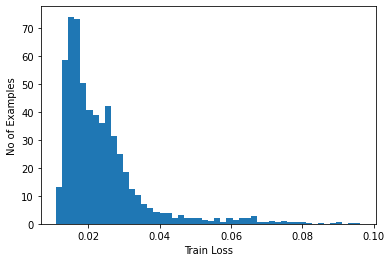

In [18]:
plt.hist(train_loss,bins=50,density=True)
plt.xlabel("Train Loss")
plt.ylabel("No of Examples")
plt.show()

choose a threshold value that is one standard deviations above the mean.

In [19]:
threshold=np.mean(train_loss)+np.std(train_loss)
print("Threshold",threshold)

Threshold 0.03514561


In [20]:
reconstructions=autoencoder.predict(anomalous_test_data)
reconstructions

14/14 [==============================] - 0s 921us/step


array([[0.43357268, 0.32915723, 0.32700688, ..., 0.5119895 , 0.51036143,
        0.41725692],
       [0.43476796, 0.3277702 , 0.3340513 , ..., 0.51281226, 0.5055789 ,
        0.41970572],
       [0.43457153, 0.32710084, 0.33470806, ..., 0.5112259 , 0.50437015,
        0.42150193],
       ...,
       [0.4359787 , 0.33063558, 0.33996722, ..., 0.5125359 , 0.5044554 ,
        0.42206332],
       [0.4345725 , 0.32574254, 0.33372596, ..., 0.51176995, 0.5034403 ,
        0.42292392],
       [0.42793077, 0.31905687, 0.30582923, ..., 0.5113718 , 0.5164243 ,
        0.41375273]], dtype=float32)

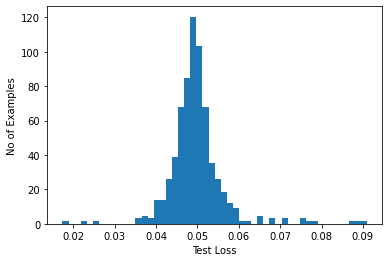

In [21]:
test_loss=tf.keras.losses.mae(reconstructions,anomalous_test_data).numpy()
plt.hist(test_loss,bins=50,density=True)
plt.xlabel("Test Loss")
plt.ylabel("No of Examples")
plt.show()

Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. 

=Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [22]:
def predict(model,data,threshold):
    reconstructions=model(data)
    loss=tf.keras.losses.mae(reconstructions,data)
    return tf.math.less(loss,threshold)
def print_stats(prediction,labels):
    print("Accuracy={}".format(accuracy_score(labels,preds)))
    print("Precision={}".format(precision_score(labels,preds)))
    print("Recall={}".format(recall_score(labels,preds)))

In [23]:
preds=predict(autoencoder,test_data,threshold)
print_stats(preds,test_labels)

Accuracy=0.945
Precision=0.9941291585127201
Recall=0.9071428571428571
